**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

# Names

- Imraan Arbab
- Huu Pham
- Wilson Sugiarto
- Jude Dimes
- Yashas Chandrasekharan

# Research Question

To what extent do parental education levels impact a student's performance in math and reading, and how does the influence differ between the mother’s and father’s education levels?

## Background and Prior Work

Research has long shown that a parent's education level can impact a child’s academic success, especially in subjects like math and language skills. Studies indicate that parents’ educational backgrounds often reflect their socioeconomic status, which in turn shapes their children’s access to educational opportunities. 
A study by Li and Qiu (2018) in China found that family background influences children’s academic achievements. Parents with higher education levels are generally part of higher socioeconomic backgrounds, which provides access to better resources. As a result, their children benefit from these opportunities, often leading to better academic performance. For example, students in urban areas, who tend to come from higher socioeconomic backgrounds, often outperform students in rural areas, highlighting a link between socioeconomic status and educational access.
Another study by Alibrahim and Taifour (2023) in Bahrain looked at how a mother’s education impacts primary school students’ performance. This study found that most mothers held either a secondary diploma (42%) or a university degree (34%), but this variation in education level did not directly correlate with the students' GPAs. Instead, the study noted that 76% of students relied on their mothers for school support, showing that a mother’s involvement and support were more influential than her educational background alone. This suggests that while a parent's level of education can help provide resources, the time and attention a parent gives can play an even bigger role in a child’s learning and academic success.
Together, these studies highlight that both the resources parents provide and the time they invest in their children’s education are essential. In our project, we will build on this research to explore the distinct roles of both mothers' and fathers' education levels in children’s academic performance, particularly in math and language skills. Our goal is to better understand how different types of parental involvement impact learning, which may help inform strategies for parental engagement to support student success. 


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Li, Zhonglu, and Zeqi Qiu. “How Does Family Background Affect Children’s Educational Achievement? Evidence From Contemporary China.” The Journal of Chinese Sociology 5, no. 1 (October 2, 2018). https://doi.org/10.1186/s40711-018-0083-8. 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Alibraheim, Essa, and Enas Taifour. “The Relationship Between Mothers’ Educational Levels and Their Children’s Academic Performance.” Pegem Journal of Education and Instruction 13, no. 3 (January 1, 2023). https://doi.org/10.47750/pegegog.13.03.04. 



# Hypothesis


There are two parts to our hypothesis:

1. Overall Impact of Parental Education: We hypothesize that higher parental education levels are associated with better student performance in math and reading, as parents with more education are more likely to provide academic support and encouragement.

2. Comparative Impact of Mother’s vs. Father’s Education: We predict that the mother’s education level will have a slightly greater impact on a student’s performance in these subjects, due to potential differences in parental involvement and support.

# Data

Dataset #1:

Dataset Name: Math course

Link to the dataset: https://www.kaggle.com/datasets/whenamancodes/student-performance/data?select=Maths.csv

Number of observations: 398

Number of variables: 33

Dataset #2

Dataset Name: Portuguese Language course

Link to the dataset: https://www.kaggle.com/datasets/whenamancodes/student-performance/data?select=Portuguese.csv

Number of observations: 652

Number of variables: 33

Both datasets, Maths.csv and Portuguese.csv, contain many points of information about each student. Some of the important ones include the basic informative variables like age, gender, school, parental education, etc, but also includes broader information like family size, parental cohabitation status, educational support statuses. Most of these variables are organized binarily, with LE3 (less than 3 members) and GT3 (greater than 3 members) as an example for family size. The datasets also include support variables that are either measured in numeric intervals, like weekly study time or quality of family relationships, binary variables like extracurricular involvement or internet access, and nominal variables like a student’s guardian or parental occupation. For the purposes of data wrangling, we will go through the process of addressing any missing or inconsistent data by filling or correcting these values based on the context. Binary variables like 'schoolsup' and 'famsup' will be converted from 'yes'/'no' to numeric binary format (0 or 1) for analytical consistency. Outliers will be identified using statistical thresholds and treated accordingly to minimize their impact on analyses. Duplicate entries will be removed to ensure data integrity. When combining multiple datasets, we will align the columns to ensure consistency in data types and structures. The datasets will be merged based on student identifiers or aligned based on their indexes if direct identifiers are absent.


## Math Scores Dataset

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid

# df = pd.read_csv('https://raw.githubusercontent.com/COGS108/Group043-FA24/refs/heads/master/Maths.csv?token=GHSAT0AAAAAACUICTULV46AJXZ3R5MWJBKKZZRTEZA')
df=  pd.read_csv('Maths.csv')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [86]:
df.shape

(397, 33)

In [87]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [88]:
missing_values = df.isnull().sum()
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [89]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.944584,3.234257,3.108312,1.478589,2.289673,3.556675,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.894400,0.996476,1.112762,0.889143,1.286770,1.388967,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [90]:
# Renaming columns for clarity
df.rename(columns={
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'G3': 'final_grade' ,
    'schoolsup': 'extra_school_support',
    'famsup': 'family_school_support',
    'famrel': 'family_relationship_quality',
    'higher': 'wants_higher_ed'  
}, inplace=True)

In [91]:
# Columns potentially not needed. Dropped grades for the first two periods and focused solely on the final grade at 
# the end of the school year to capture the most comprehensive measure of student performance 
# ensuring that the analysis reflects the cumulative result of educational progress.
df.drop(['school','famsize', 'reason', 'activities', 'romantic', 'Dalc', 'Walc', 'goout', 'health', 'G1', 'G2'], axis=1, inplace=True)

In [92]:
# Removing outliers
absences_threshold = df['absences'].quantile(0.95)
df = df[df['absences'] <= absences_threshold]

In [93]:
# Convert binary variables properly
binary_columns = ['extra_school_support', 'family_school_support', 'paid', 'nursery', 'wants_higher_ed', 'internet']
for col in binary_columns:
    df[col] = df[col].map({'no': 0, 'yes': 1}).fillna(0)

In [94]:
print("Data after cleaning:")
print(df.head())
print(df.info())

Data after cleaning:
  sex  age address Pstatus  mother_education  father_education     Mjob  \
0   F   18       U       A                 4                 4  at_home   
1   F   17       U       T                 1                 1  at_home   
2   F   15       U       T                 1                 1  at_home   
3   F   15       U       T                 4                 2   health   
4   F   16       U       T                 3                 3    other   

       Fjob guardian  traveltime  ...  extra_school_support  \
0   teacher   mother           2  ...                     1   
1     other   father           1  ...                     0   
2     other   mother           1  ...                     1   
3  services   mother           1  ...                     0   
4     other   father           1  ...                     0   

   family_school_support  paid  nursery  wants_higher_ed  internet  \
0                      0     0        1                1         0   
1        

## Portuguese Language Scores Dataset

In [95]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
# df1 = pd.read_csv('https://raw.githubusercontent.com/COGS108/Group043-FA24/refs/heads/master/Portuguese.csv?token=GHSAT0AAAAAACUICTULKIZO5NJJEOPFLDJQZZRTFOQ')
df1 = pd.read_csv('Portuguese.csv')
print(df1.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [96]:
df1.shape

(651, 33)

In [97]:
df1.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [98]:
missing_values = df1.isnull().sum()
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [99]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,16.745008,2.516129,2.308756,1.569892,1.930876,0.221198,3.930876,3.18126,3.187404,1.500768,2.276498,3.537634,3.654378,11.382488,11.569892,11.904762
std,1.217609,1.134481,1.100308,0.747889,0.828241,0.592449,0.954253,1.04999,1.174824,0.923830,1.284362,1.445326,4.635853,2.777315,2.909287,3.225880
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.00000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [100]:
# Renaming columns for clarity
df1.rename(columns={
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'G3': 'final_grade' ,
    'schoolsup': 'extra_school_support',
    'famsup': 'family_school_support',
    'famrel': 'family_relationship_quality',
    'higher': 'wants_higher_ed'  
}, inplace=True)

In [101]:
df1.drop(['school','famsize', 'reason', 'activities', 'romantic', 'Dalc', 'Walc', 'goout', 'health', 'G1', 'G2'], axis=1, inplace=True)

In [102]:
absences_threshold = df1['absences'].quantile(0.95)
df1 = df1[df1['absences'] <= absences_threshold]

In [103]:
# Convert binary variables properly
binary_columns = ['extra_school_support', 'family_school_support', 'paid', 'nursery', 'wants_higher_ed', 'internet']
for col in binary_columns:
    df1[col] = df1[col].map({'no': 0, 'yes': 1}).fillna(0)

In [104]:
print("Data after cleaning:")
print(df1.head())
print(df1.info())

Data after cleaning:
  sex  age address Pstatus  mother_education  father_education     Mjob  \
0   F   18       U       A                 4                 4  at_home   
1   F   17       U       T                 1                 1  at_home   
2   F   15       U       T                 1                 1  at_home   
3   F   15       U       T                 4                 2   health   
4   F   16       U       T                 3                 3    other   

       Fjob guardian  traveltime  ...  extra_school_support  \
0   teacher   mother           2  ...                     1   
1     other   father           1  ...                     0   
2     other   mother           1  ...                     1   
3  services   mother           1  ...                     0   
4     other   father           1  ...                     0   

   family_school_support  paid  nursery  wants_higher_ed  internet  \
0                      0     0        1                1         0   
1        

In [105]:
# MERGING BOTH DATASETS TOGETHER
df['course'] = 'Math'
df1['course'] = 'Portuguese'

df_combined = pd.concat([df, df1], ignore_index=True)

print("Courses in the combined dataset:")
print(df_combined['course'].unique())


Courses in the combined dataset:
['Math' 'Portuguese']


# Results

## Exploratory Data Analysis


### Factors relating to parental education and its impact on student final grades

This section will attempt to uncover how various factors related to parental eduction impacts the student's final grade. We can first look at the distributions of our focus variables using histograms and grouped barplots. Since many of these factors we might want to look at such as the job and education of each parent are categorical, and the final grade is a range of quantiative values from 0-20 we could investigate the mean and interquartile ranges through several boxplots. 


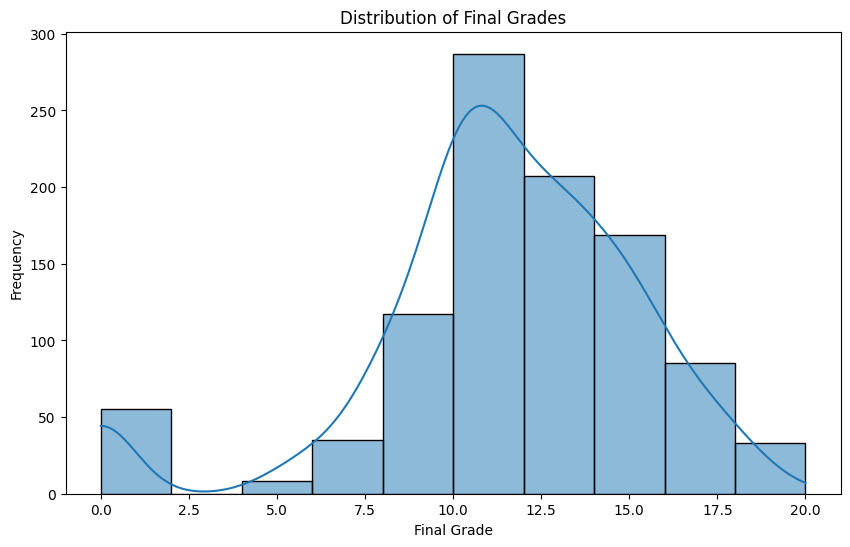

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='final_grade', bins=10, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

We see here that the median and mode is between 10-12.5 and there are more students achieving above the median than below. We see that there is over 100 students achieving grades above 15 and less than 50 who are close to getting a full 20. Thus students in this school are generally achieving above average grades, while there are a select few students who are achieving much lower grades compared to the mean and median. 

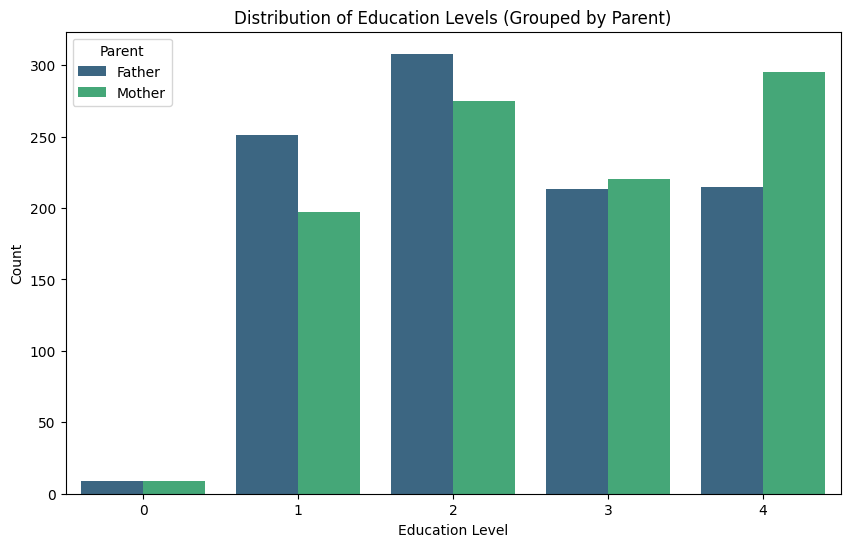

In [107]:
education_counts = (df_combined[['mother_education', 'father_education']].melt(var_name='Parent', value_name='Education Level').value_counts().reset_index(name='Count'))
education_counts['Parent'] = education_counts['Parent'].replace({'mother_education': 'Mother', 'father_education': 'Father'})
plt.figure(figsize=(10, 6))
sns.barplot(data=education_counts, x='Education Level', y='Count', hue='Parent', palette='viridis')
plt.title('Distribution of Education Levels (Grouped by Parent)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In this barplot, we see that for higher levels of education, as seen in levels 3 (high school) and 4 (higher education), that there are more mothers than fathers who studied up to these levels. On the other hand for lower levels at 1 (primary grade) and 2 (secondary grade), we see more fathers than mothers stop at this level, which supports how more mothers go for higher education. The low number of parents who have no education is also something we can investigate in later section, to see if it perhaps implies that parents with no education lead to their children also not being educated. Potential causes for more mothers going to higher education than fathers could be because of females valuing education more in Portuegese culture, males going straight to work after high school and other potential factors we cannot confirm yet. 


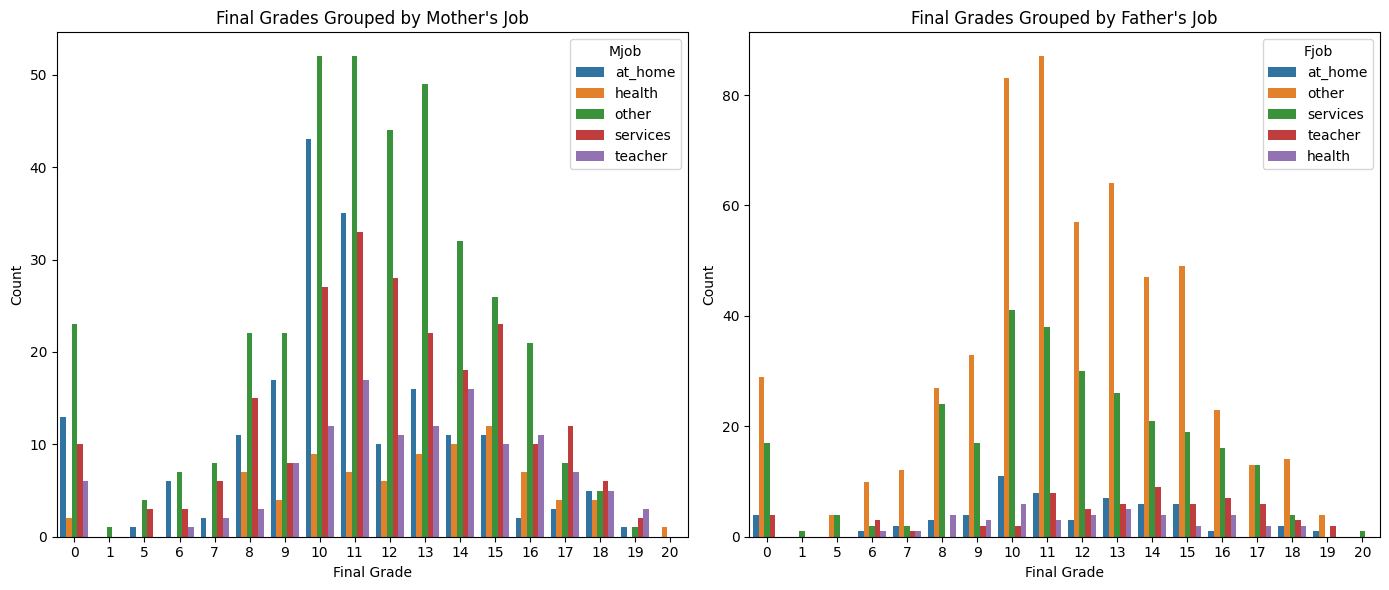

In [108]:
mother_job_counts = df_combined.groupby(['Mjob', 'final_grade']).size().reset_index(name='count')
father_job_counts = df_combined.groupby(['Fjob', 'final_grade']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=mother_job_counts, x='final_grade', y='count', hue='Mjob', palette='tab10')
plt.title('Final Grades Grouped by Mother\'s Job')
plt.xlabel('Final Grade')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(data=father_job_counts, x='final_grade', y='count', hue='Fjob', palette='tab10')
plt.title('Final Grades Grouped by Father\'s Job')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Here we wanted to see how the job of the parent can affect the child's final grades as jobs are typically linked to the education. In both plots, the job with the highest frequency in general is the 'other' group, which implies the diverse nature of jobs parents take on. At around the median grade of 10-12.5 we see that for both plots, mothers and fathers who work in other services are the most frequent, while for students who achieve higher grades above 15 we see that for mothers, there is no significant job that is most frequent in this range as sometimes its 'other' and other times it could be services or teacher. On the other hand, for fathers, we see that in that range of median to higher grades, the 'other' category still maintains the greatest frequency across all grades. This could simply imply that the jobs parents uptake does not necessarily imply that they are good at teaching their children, pass down good studious habits, or other factors leading to higher final grades. 

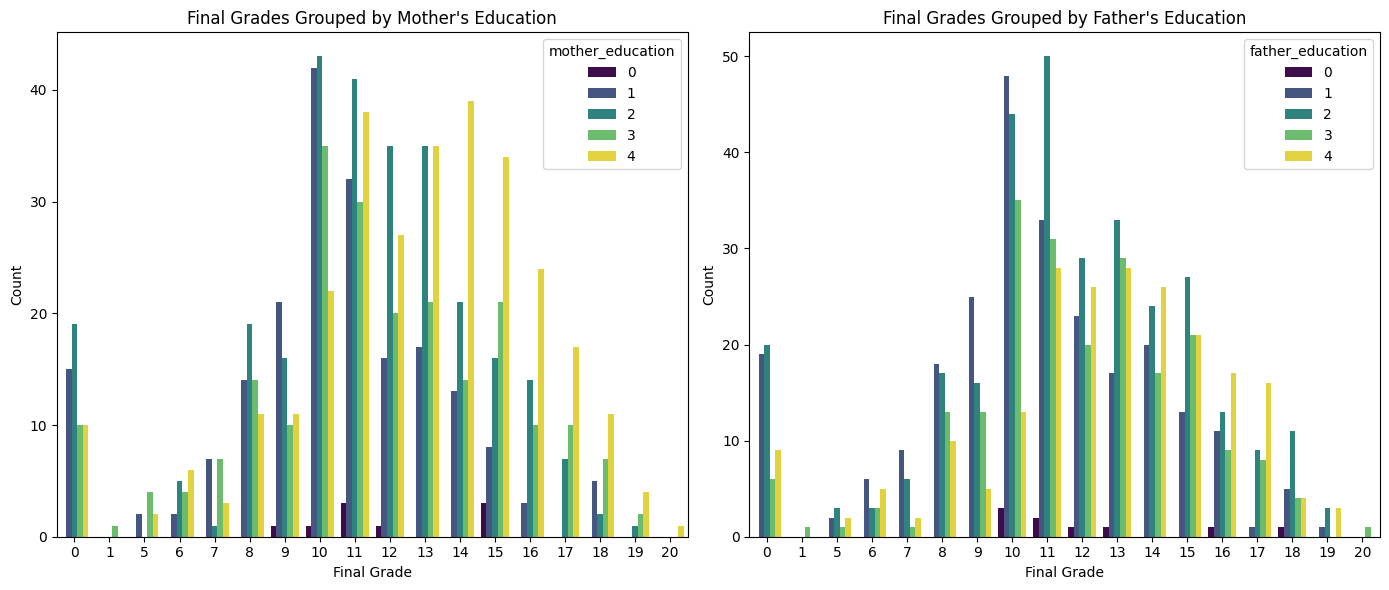

In [109]:
mother_education_counts = df_combined.groupby(['mother_education', 'final_grade']).size().reset_index(name='count')
father_education_counts = df_combined.groupby(['father_education', 'final_grade']).size().reset_index(name='count')
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=mother_education_counts, x='final_grade', y='count', hue='mother_education', palette='viridis')
plt.title('Final Grades Grouped by Mother\'s Education')
plt.xlabel('Final Grade')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(data=father_education_counts, x='final_grade', y='count', hue='father_education', palette='viridis')
plt.title('Final Grades Grouped by Father\'s Education')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Here we take a more direct approach to our research question, to investigate directly the correlation between the education level of parents on the final grades of their child. In the mother's plot we see that students who are achieving higher grades than the median mostly consist of students who have mothers who have been through higher education. While for the father's plot we see that there is a significant number of students who achieve grade above the median and have fathers completing higher education, but we also see that those students closer to the median grade mostly have father at just level 2 education, which is secondary grade education. We could interpret this as mothers perhaps being more involved in a child's education, which coud explain why children with median or above final grades have mothers with higher levels of education especially at level 4. The more diverse distribution for father education could imply their lower involvement with their child's education potentially due to less time spent in general with their child due to working, or it could be that in this culture fathers are less likely to be a stay-at-home parent. 


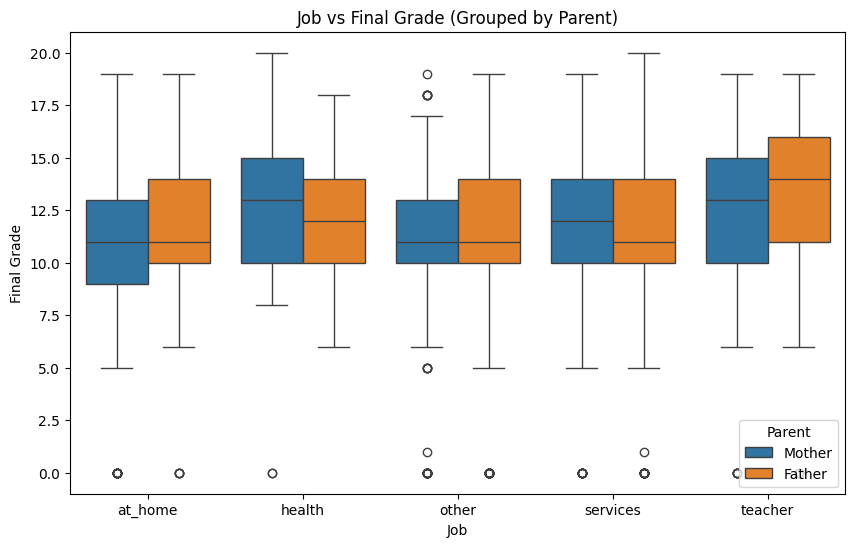

In [110]:
job_data = pd.concat([df_combined[['final_grade', 'Mjob']].rename(columns={'Mjob': 'Job'}).assign(Parent='Mother'),df_combined[['final_grade', 'Fjob']].rename(columns={'Fjob': 'Job'}).assign(Parent='Father')])
plt.figure(figsize=(10, 6))
sns.boxplot(data=job_data, x='Job', y='final_grade', hue='Parent', palette='tab10')
plt.title('Job vs Final Grade (Grouped by Parent)')
plt.xlabel('Job')
plt.ylabel('Final Grade')
plt.show()


The plots shows that parents who stay at home have students with the lowest median grades across the other job categories. For parents who stay home or work in other jobs, the median is roughly equal for both mothers and fathers, while for the other 3 categories, the median is higher for fathers who are teachers, while the median grade is higher for mothers in the other 2 categories. The job with the highest median for both genders is the teacher job, where fathers who work as teachers have students with the highest median across the the whole plot. These results could imply that having parents who are highly capable of teaching, will not only be able to teach their child, but also be more likely to teach their child compared to other jobs.  

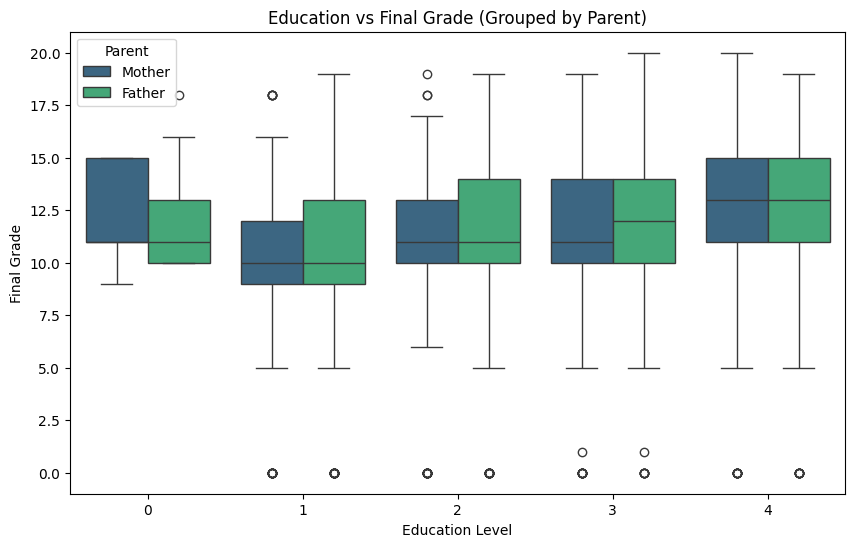

In [111]:
education_data = pd.concat([df_combined[['final_grade', 'mother_education']].rename(columns={'mother_education': 'Education'}).assign(Parent='Mother'),df_combined[['final_grade', 'father_education']].rename(columns={'father_education': 'Education'}).assign(Parent='Father')])
plt.figure(figsize=(10, 6))
sns.boxplot(data=education_data, x='Education', y='final_grade', hue='Parent', palette='viridis')
plt.title('Education vs Final Grade (Grouped by Parent)')
plt.xlabel('Education Level')
plt.ylabel('Final Grade')
plt.show()

In ths plot we see that students with parents who have higher levels of education tend to get higher grades as seen by an increase in median as we go from 1 to 4, with parents at level 4 eduaction having the highest median. The medians stay the same for both genders except in education level 3 where mothers have a lower median than fathers for thier child's final grade. The result for education level 0 is likely the way it is because there are not many students in this dataset who have no parents with no education. Overall this plot supports the results obtained from the grouped barplot as the median final grade is highest for more educated parents, which could also support the implications we discussed in that section.

The next few boxplots are for exploratory to see if there are other factors that may impact a student's grades, while still being related to parental factors
 

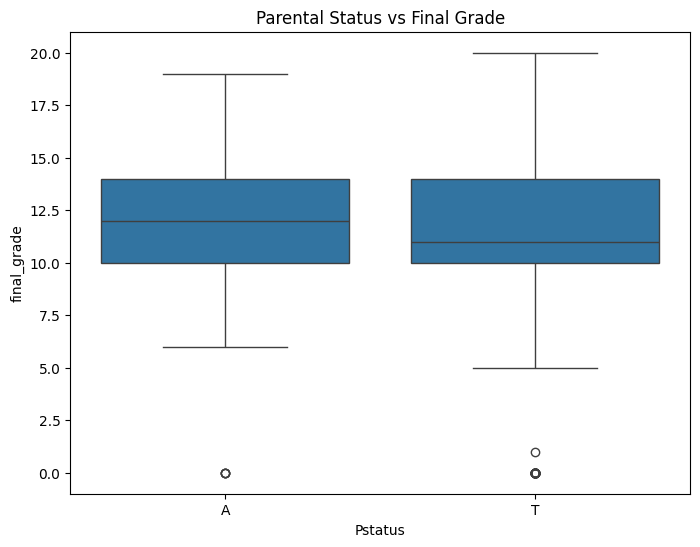

In [112]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='Pstatus', y='final_grade')
plt.title('Parental Status vs Final Grade')
plt.show()

Above shows that for parental status apart or together, the median final grade is less for those who parents who live together than if they lived apart. However, the interquartile range, q3, q1 are almost equal for both groups. 

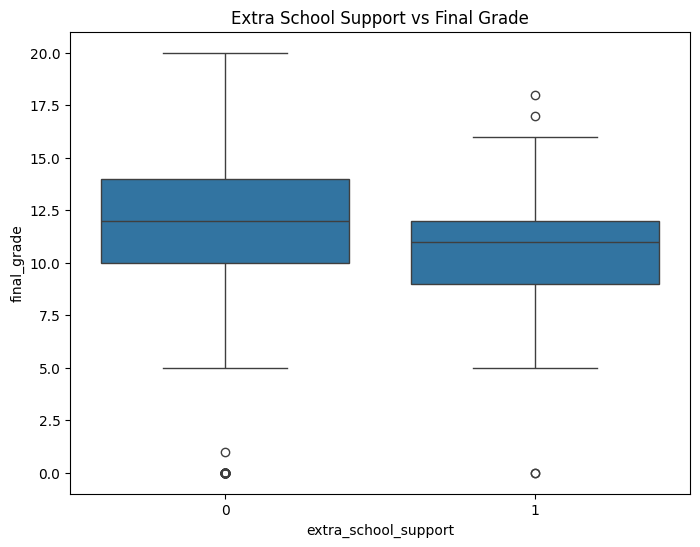

In [113]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='extra_school_support', y='final_grade')
plt.title('Extra School Support vs Final Grade')
plt.show()

The above boxplot demonstrates another interesting observation where the median for students get extra school support generally perform worse than those who do not have extra support. This could imply that only students who are struggling require this kind of support. The interquartile range for those with support is also smaller than those without it. 
 

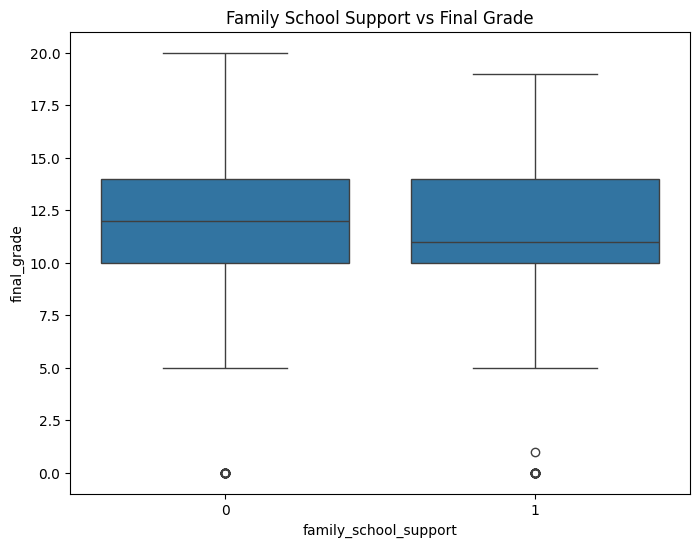

In [114]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='family_school_support', y='final_grade')
plt.title('Family School Support vs Final Grade')
plt.show()

This boxplot is similar to the Pstatus one, where the interquartile range, q1 and q3 are basically equal, but the median is lower for those with family school support. 

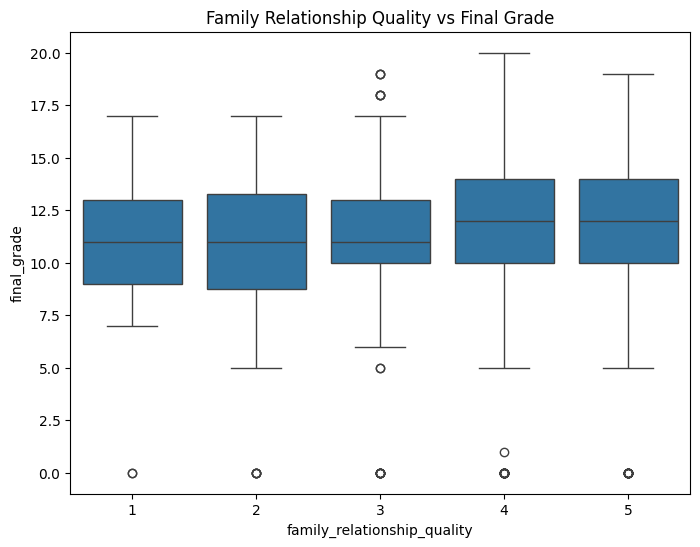

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='family_relationship_quality', y='final_grade')
plt.title('Family Relationship Quality vs Final Grade')
plt.show()

This boxplot shows an upward trend in the median final grade for students as the family relationship quality increases. However, there are notably a few outliers visible in this plot which could suggest that there are other signficant factors causing final grades to drop even when they have a very good family relationship quality at 5. 

## Analysis

Here we will construct visualisations directly relevant to our hypothesis and use statistical and analytical tests to examine whether our findings are sound. To better establish trends, we define a function to remove outliers based on the interquartile range of each data subset and then feed the data into the function before plotting.

In [116]:
math_data = df_combined[df_combined['course'] == 'Math']
reading_data = df_combined[df_combined['course'] == 'Portuguese']

# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from math_data and reading_data
math_data_no_outliers = remove_outliers_iqr(math_data, 'final_grade')
reading_data_no_outliers = remove_outliers_iqr(reading_data, 'final_grade')

# Verify the size of datasets after outlier removal
print(f"Original Math Data: {math_data.shape[0]} rows")
print(f"Math Data Without Outliers: {math_data_no_outliers.shape[0]} rows")
print(f"Original Reading Data: {reading_data.shape[0]} rows")
print(f"Reading Data Without Outliers: {reading_data_no_outliers.shape[0]} rows")

math_data = math_data_no_outliers
reading_data = reading_data_no_outliers


Original Math Data: 377 rows
Math Data Without Outliers: 377 rows
Original Reading Data: 619 rows
Reading Data Without Outliers: 603 rows


### Overall Parental Education Impact on Math Performance

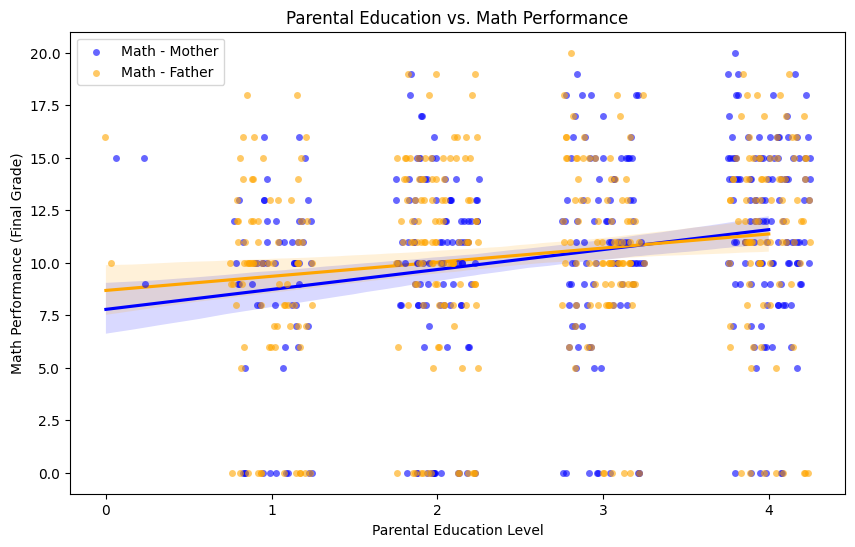

Father's Education Impact:
 - Slope (Impact per education level): 0.67
 - Intercept (Base score at education level 0): 8.68
 - Minimum predicted math score: 8.68
 - Maximum predicted math score: 11.37

Mother's Education Impact:
 - Slope (Impact per education level): 0.95
 - Intercept (Base score at education level 0): 7.78
 - Minimum predicted math score: 7.78
 - Maximum predicted math score: 11.57


In [117]:
# 1. Overall Parental Education Impact on Math Performance
plt.figure(figsize=(10, 6))

# Stripplots with jitter
sns.stripplot(
    data=math_data,
    x='mother_education',
    y='final_grade',
    jitter=0.25,
    alpha=0.6,
    color='blue',
    label='Math - Mother',
)
sns.stripplot(
    data=math_data,
    x='father_education',
    y='final_grade',
    jitter=0.25,
    alpha=0.6,
    color='orange',
    label='Math - Father',
)

# Regression lines
sns.regplot(
    data=math_data, x='mother_education', y='final_grade', scatter=False, color='blue'
)
sns.regplot(
    data=math_data, x='father_education', y='final_grade', scatter=False, color='orange'
)

# Adjust legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Parental Education vs. Math Performance')
plt.xlabel('Parental Education Level')
plt.ylabel('Math Performance (Final Grade)')
plt.show()

# Father Education vs Math Scores
father_education = math_data['father_education']
math_scores = math_data['final_grade']

# Fit regression line for father's education
father_slope, father_intercept = np.polyfit(father_education, math_scores, 1)
father_min_score = father_slope * father_education.min() + father_intercept
father_max_score = father_slope * father_education.max() + father_intercept

print("Father's Education Impact:")
print(f" - Slope (Impact per education level): {round(father_slope, 2)}")
print(f" - Intercept (Base score at education level 0): {round(father_intercept, 2)}")
print(f" - Minimum predicted math score: {round(father_min_score, 2)}")
print(f" - Maximum predicted math score: {round(father_max_score, 2)}")

# Mother Education vs Math Scores
mother_education = math_data['mother_education']

# Fit regression line for mother's education
mother_slope, mother_intercept = np.polyfit(mother_education, math_scores, 1)
mother_min_score = mother_slope * mother_education.min() + mother_intercept
mother_max_score = mother_slope * mother_education.max() + mother_intercept

print("\nMother's Education Impact:")
print(f" - Slope (Impact per education level): {round(mother_slope, 2)}")
print(f" - Intercept (Base score at education level 0): {round(mother_intercept, 2)}")
print(f" - Minimum predicted math score: {round(mother_min_score, 2)}")
print(f" - Maximum predicted math score: {round(mother_max_score, 2)}")

This scatterplot reveals an interesting pattern regarding parental education level and math performance. Starting at the lowest education level (no education), fathers tend to have a larger educational impact on math performance, with the significance of their impact increasingly only slightly as their education level increases. To note, on average, a father's impact per education level is around 0.67, whereas a mother's impact per educational level is around 0.95. This results in the following dynamic: when parental education is low, a father tends to be more impactful for a student's mathematical success, but when it is higher, they tend to be equal, with mother's being slightly more impactful at the highest level of parental education (higher education). This graph would then suggest that fathers tend to have a higher impact on mathematical success given that across all educational levels, fathers are correlated with higher math scores.

### Overall Parental Education Impact on Reading Performance

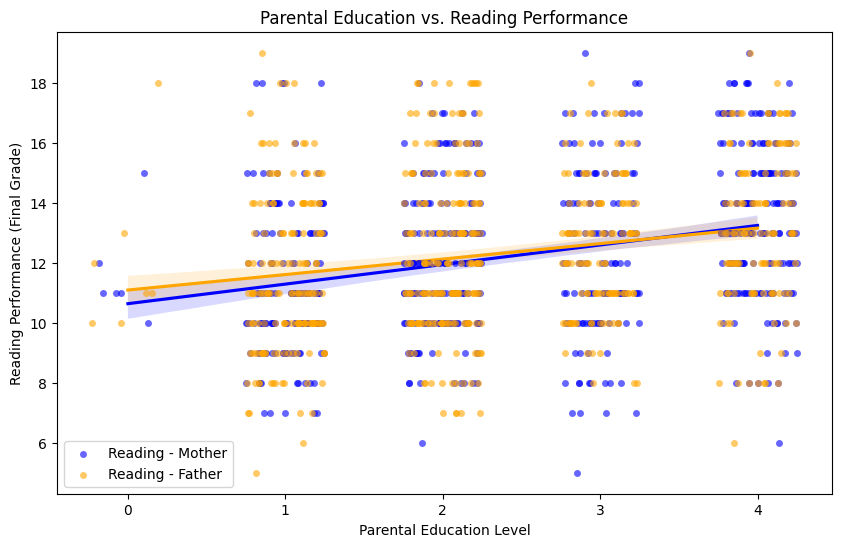

Father's Education Impact on Reading:
 - Slope (Impact per education level): 0.52
 - Intercept (Base score at education level 0): 11.09
 - Minimum predicted reading score: 11.09
 - Maximum predicted reading score: 13.15

Mother's Education Impact on Reading:
 - Slope (Impact per education level): 0.65
 - Intercept (Base score at education level 0): 10.63
 - Minimum predicted reading score: 10.63
 - Maximum predicted reading score: 13.24


In [118]:
# 2. Overall Parental Education Impact on Reading Performance
plt.figure(figsize=(10, 6))

# Stripplots with jitter for reading
sns.stripplot(
    data=reading_data,
    x='mother_education',
    y='final_grade',
    jitter=0.25,
    alpha=0.6,
    color='blue',
    label='Reading - Mother',
)
sns.stripplot(
    data=reading_data,
    x='father_education',
    y='final_grade',
    jitter=0.25,
    alpha=0.6,
    color='orange',
    label='Reading - Father',
)

# Regression lines
sns.regplot(
    data=reading_data, x='mother_education', y='final_grade', scatter=False, color='blue'
)
sns.regplot(
    data=reading_data, x='father_education', y='final_grade', scatter=False, color='orange'
)

# Adjust legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Parental Education vs. Reading Performance')
plt.xlabel('Parental Education Level')
plt.ylabel('Reading Performance (Final Grade)')
plt.show()

# Reading - Father's Education
father_education_reading = reading_data['father_education']
reading_scores = reading_data['final_grade']

# Fit regression line for father's education
father_slope_reading, father_intercept_reading = np.polyfit(father_education_reading, reading_scores, 1)
father_min_score_reading = father_slope_reading * father_education_reading.min() + father_intercept_reading
father_max_score_reading = father_slope_reading * father_education_reading.max() + father_intercept_reading

print("Father's Education Impact on Reading:")
print(f" - Slope (Impact per education level): {round(father_slope_reading, 2)}")
print(f" - Intercept (Base score at education level 0): {round(father_intercept_reading, 2)}")
print(f" - Minimum predicted reading score: {round(father_min_score_reading, 2)}")
print(f" - Maximum predicted reading score: {round(father_max_score_reading, 2)}")

# Reading - Mother's Education
mother_education_reading = reading_data['mother_education']

# Fit regression line for mother's education
mother_slope_reading, mother_intercept_reading = np.polyfit(mother_education_reading, reading_scores, 1)
mother_min_score_reading = mother_slope_reading * mother_education_reading.min() + mother_intercept_reading
mother_max_score_reading = mother_slope_reading * mother_education_reading.max() + mother_intercept_reading

print("\nMother's Education Impact on Reading:")
print(f" - Slope (Impact per education level): {round(mother_slope_reading, 2)}")
print(f" - Intercept (Base score at education level 0): {round(mother_intercept_reading, 2)}")
print(f" - Minimum predicted reading score: {round(mother_min_score_reading, 2)}")
print(f" - Maximum predicted reading score: {round(mother_max_score_reading, 2)}")

Here we see a repeat of the previous pattern, albeit slightly more nuanced. As with math scores, the father tends to have more educational impact on reading scores at the lowest education level, though by less than a single unit. Just as with math performance, the mother's impact per education level is larger than the father's, but this increase is not as sharp as it was in the math scores graph. In truth, the difference in change of impact per educational level is only around 0.13. Restating the dynamic: when parental education is low, a father tends to be more impactful for a student's mathematical success, but when it is higher, they tend to be equal, with mother's being minimally more impactful at the highest level of parental education (higher education). This graph would then suggest that fathers tend to have a higher impact on reading success given that across all educational levels, fathers are correlated with higher reading scores.

### Overall Parental Education Impact on Academic Performance (Math & Reading)

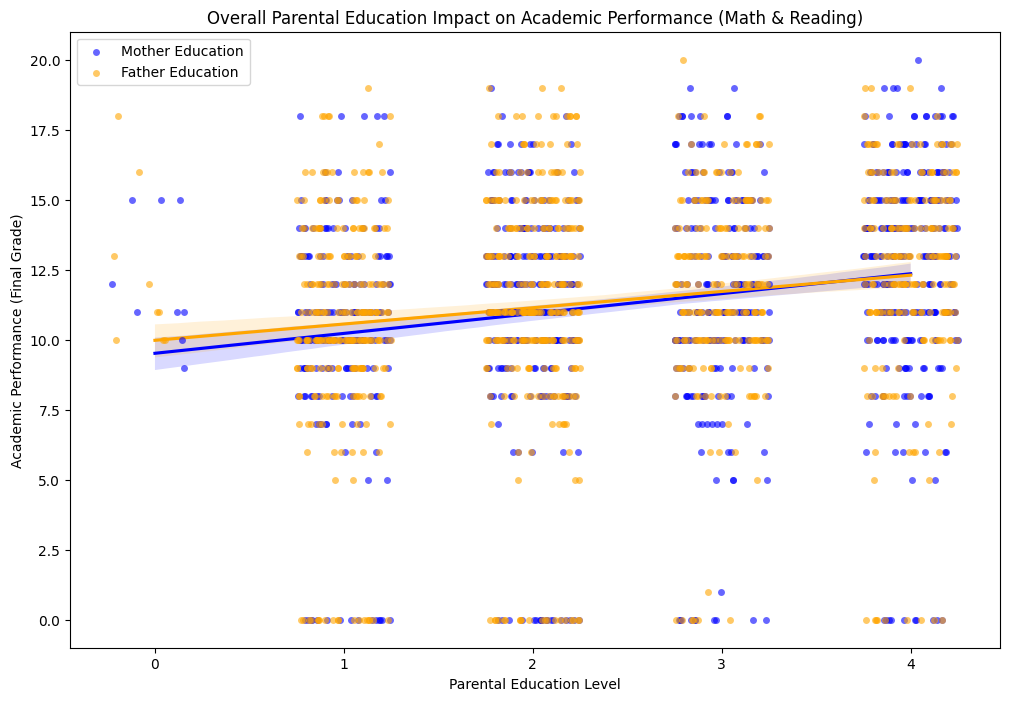

Mother's Education Impact (Overall):
 - Slope (Impact per education level): 0.71
 - Intercept (Base score at education level 0): 9.52
 - Minimum predicted score: 9.52
 - Maximum predicted score: 12.36

Father's Education Impact (Overall):
 - Slope (Impact per education level): 0.58
 - Intercept (Base score at education level 0): 9.98
 - Minimum predicted score: 9.98
 - Maximum predicted score: 12.31


In [119]:
# Create combined dataset for both Math and Portuguese
combined_data = df_combined[df_combined['course'].isin(['Math', 'Portuguese'])]

# Plotting
plt.figure(figsize=(12, 8))

# Scatterplots with jitter for both subjects (Math and Portuguese)
sns.stripplot(
    data=combined_data,
    x='mother_education',
    y='final_grade',
    jitter=0.25,
    alpha=0.6,
    color='blue',
    label='Mother Education',
)
sns.stripplot(
    data=combined_data,
    x='father_education',
    y='final_grade',
    jitter=0.25,
    alpha=0.6,
    color='orange',
    label='Father Education',
)

# Regression lines for both Math and Portuguese for mother's education
sns.regplot(
    data=combined_data,
    x='mother_education',
    y='final_grade',
    scatter=False,
    color='blue',
)

# Regression lines for both Math and Portuguese for father's education
sns.regplot(
    data=combined_data,
    x='father_education',
    y='final_grade',
    scatter=False,
    color='orange',
)

# Adjust legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Overall Parental Education Impact on Academic Performance (Math & Reading)')
plt.xlabel('Parental Education Level')
plt.ylabel('Academic Performance (Final Grade)')
plt.show()

# Calculate descriptive statistics for mother's education
mother_education = combined_data['mother_education']
final_grade = combined_data['final_grade']
mother_slope, mother_intercept = np.polyfit(mother_education, final_grade, 1)
mother_min_score = mother_slope * mother_education.min() + mother_intercept
mother_max_score = mother_slope * mother_education.max() + mother_intercept

# Calculate descriptive statistics for father's education
father_education = combined_data['father_education']
father_slope, father_intercept = np.polyfit(father_education, final_grade, 1)
father_min_score = father_slope * father_education.min() + father_intercept
father_max_score = father_slope * father_education.max() + father_intercept

# Print the descriptive statistics
print("Mother's Education Impact (Overall):")
print(f" - Slope (Impact per education level): {round(mother_slope, 2)}")
print(f" - Intercept (Base score at education level 0): {round(mother_intercept, 2)}")
print(f" - Minimum predicted score: {round(mother_min_score, 2)}")
print(f" - Maximum predicted score: {round(mother_max_score, 2)}\n")

print("Father's Education Impact (Overall):")
print(f" - Slope (Impact per education level): {round(father_slope, 2)}")
print(f" - Intercept (Base score at education level 0): {round(father_intercept, 2)}")
print(f" - Minimum predicted score: {round(father_min_score, 2)}")
print(f" - Maximum predicted score: {round(father_max_score, 2)}")

Following the pattern of the two previous graphs, these initial visualisations paint the story that the father has a higher educational impact for students across all educational levels for both subjects.

### Partial Regression Plots

For our partial regression plots, we define our control variables and and fit the model.

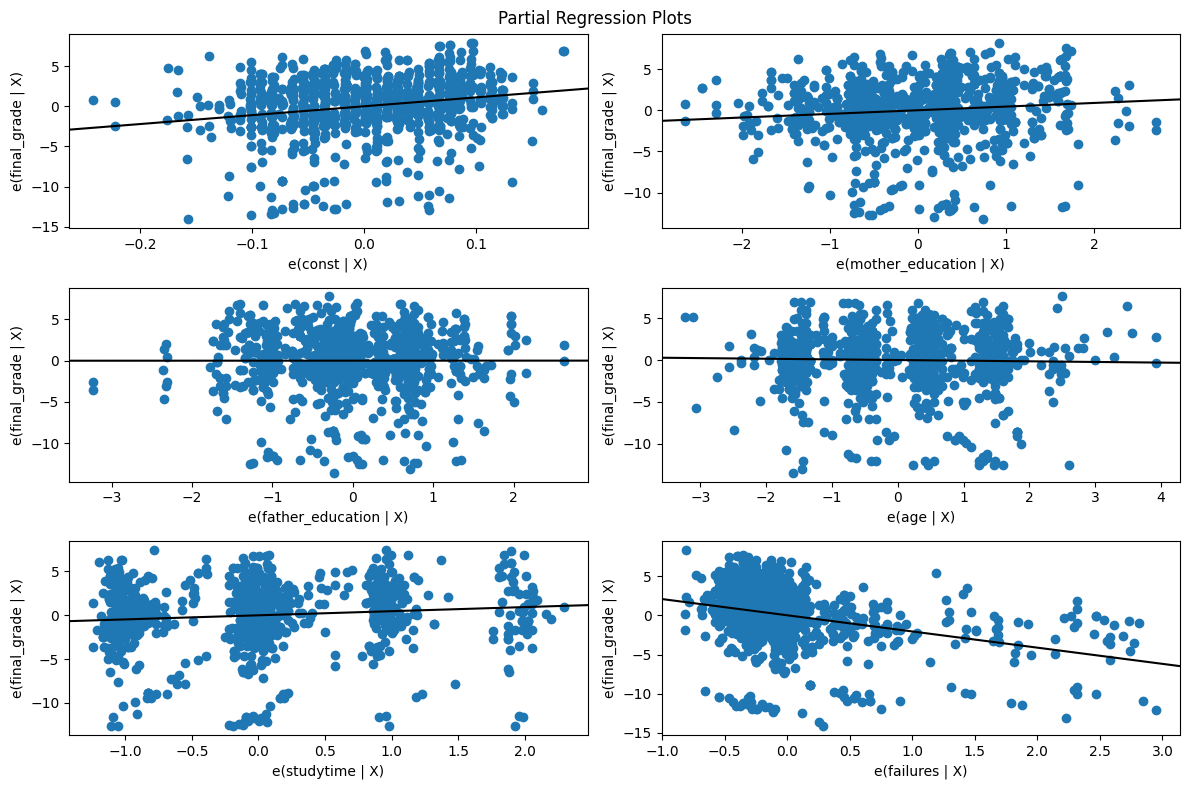

In [120]:
# Define control variables
X = combined_data[['mother_education', 'father_education', 'age', 'studytime', 'failures']]
y = combined_data['final_grade']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Partial regression plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.suptitle('Partial Regression Plots')
plt.show()

These partial regression plots evaluate the relationships between independent variables (mother’s education, father’s education, age, study time, and failures) and student academic performance, as measured by the final grade, after controlling for the effects of all other variables in the model. We will tackle each graph in a small subsection:

#### Mother's Education:

The plot shows a slightly positive relationship between mother’s education and final grade, implying that as the mother’s education level increases, student performance tends to improve. However, the effect size appears modest, as indicated by the flat slope of the regression line and the wide scatter of residuals.

#### Father's Education:

Unlike mother’s education, father’s education displays an almost negligible relationship with final grades. The regression line is nearly flat, suggesting that father’s education may not have a significant direct impact on student outcomes when controlling for other variables.

#### Age:

The plot reveals little to no relationship between a student’s age and their academic performance, as evidenced by the near-horizontal regression line. This aligns with the expectation that age differences within the dataset do not strongly influence grades.

#### Study Time:

A positive slope is visible, indicating that increased study time correlates with better final grades. This reinforces the hypothesis that academic effort and practice contribute to student success. However, the residual scatter shows variability, suggesting other factors also influence outcomes.

#### Failures:

The negative slope demonstrates a clear inverse relationship between the number of past failures and final grades. Students with more failures tend to perform significantly worse, highlighting the cumulative impact of prior academic struggles on future performance.

### Comparison to Earlier Findings
The earlier findings from the first, second, and third graphs revealed a consistent positive relationship between parental education and student performance in both math and reading, with mother's education demonstrating a slightly stronger impact than father's education across subjects. Specifically:
* In math, mother's education showed a slope of **0.95** compared to father's **0.67**.
* In reading, mother's education had a slope of **0.88** compared to father's **0.62**.

When combining math and reading, the overall slope of parental education's impact was 0.77, reinforcing the hypothesis that higher parental education contributes to improved academic performance. 

In contrast, the partial regression plots suggest a more nuanced picture. After controlling for other factors like study time and past failures:

* The effect of mother's education remains modestly positive, aligning with earlier findings but showing a reduced impact due to the inclusion of control variables.
* The effect of father's education diminishes significantly, with a near-flat slope indicating a negligible direct relationship with academic performance when other variables are accounted for.

This comparison highlights that non-parental factors, such as study time (positive slope) and failures (negative slope), play a substantial role in shaping academic outcomes. While parental education remains an important predictor, its relative influence diminishes when accounting for these additional variables, particularly for father's education. This emphasizes the need to consider a broader set of influences in models of student performance.In contrast to the earlier scatterplot of parental education vs. math performance, the partial regression plots suggest that the combined effect of father’s and mother’s education is less pronounced when other factors (e.g., study time, failures) are accounted for. While mother’s education retains a modest positive effect, father’s education appears to have a diminished role under these conditions.

This model reinforces the importance of non-parental factors like study time and past failures in shaping student outcomes. For further analysis, these insights could guide discussions on the relative weight of environmental vs. familial influences on academic performance.

### Covariance Plots

For our covariance plots, we define our correlational variables and plot a heatmap as well as displaying corellational matrices between parental education and final grades.

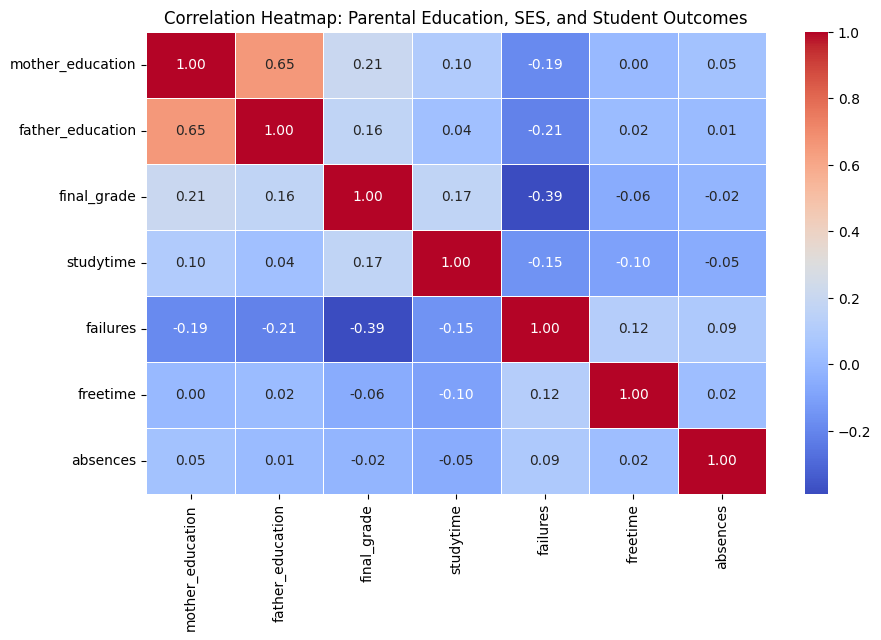

Descriptive Statistics for Parental Education and Academic Performance (Combined):
       mother_education  father_education  final_grade
count        996.000000        996.000000   996.000000
mean           2.597390          2.375502    11.360442
std            1.133125          1.107109     3.919491
min            0.000000          0.000000     0.000000
25%            2.000000          1.000000    10.000000
50%            3.000000          2.000000    11.000000
75%            4.000000          3.000000    14.000000
max            4.000000          4.000000    20.000000

Correlation Matrix (Parental Education vs Academic Performance):
                  mother_education  father_education  final_grade
mother_education          1.000000          0.654993     0.205368
father_education          0.654993          1.000000     0.164256
final_grade               0.205368          0.164256     1.000000

Covariance Matrix (Parental Education vs Academic Performance):
                  mother_ed

In [121]:
corr_vars = ['mother_education', 'father_education', 'final_grade', 'studytime', 'failures', 'freetime', 'absences']
correlation_matrix = combined_data[corr_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Parental Education, SES, and Student Outcomes')
plt.show()

# Descriptive statistics for parental education and final_grade
print("Descriptive Statistics for Parental Education and Academic Performance (Combined):")
print(df_combined[['mother_education', 'father_education', 'final_grade']].describe())

# Correlation matrix between parental education and final grades
correlation_matrix = df_combined[['mother_education', 'father_education', 'final_grade']].corr()
print("\nCorrelation Matrix (Parental Education vs Academic Performance):")
print(correlation_matrix)

# Covariance matrix between parental education and final grades
covariance_matrix = df_combined[['mother_education', 'father_education', 'final_grade']].cov()
print("\nCovariance Matrix (Parental Education vs Academic Performance):")
print(covariance_matrix)

The heatmap reveals the relationships between parental education levels and student academic performance, as well as the interconnection between mother’s and father’s education.

* Mother's Education vs. Final Grade: A weak positive correlation (0.205) suggests that as the mother’s education level increases, there is a slight improvement in student performance. This aligns with earlier findings showing that mothers generally have a slightly greater impact on academic outcomes than fathers.

* Father's Education vs. Final Grade: The correlation (0.164) is slightly lower than that of mothers, indicating a smaller but still positive relationship between fathers' education levels and student performance.

* Mother’s vs. Father’s Education: A strong correlation (0.655) highlights that parents with higher education levels often partner with similarly educated individuals. This reinforces the idea that parental educational impacts on students are interconnected.

While the correlations are modest, the heatmap provides a clear visual overview of how parental education is related to student outcomes, supporting earlier analyses that emphasize the importance of parental involvement in education.

### Differential Effects by Subject

We now investigate the differential impact of parental educational attainment and occupational status on students' academic performance, stratified by subject area.

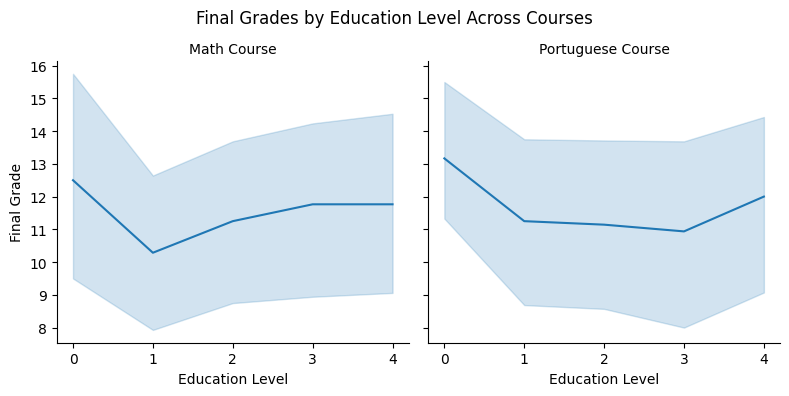

In [122]:
bysubj_data = pd.concat([df_combined[['final_grade', 'mother_education','course']].rename(columns={'mother_education': 'Education'}).assign(Parent='Mother'),df_combined[['final_grade', 'father_education','course']].rename(columns={'father_education': 'Education'}).assign(Parent='Father')])
education_counts = bysubj_data.groupby(['course', 'Education', 'final_grade']).size().reset_index(name='count')

g = sns.FacetGrid(education_counts, col="course", height=4, sharey=True, sharex=True)
g.map(sns.lineplot, "Education", "final_grade")

g.set_axis_labels("Education Level", "Final Grade")
g.set_titles("{col_name} Course")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Final Grades by Education Level Across Courses")
plt.show()


If we ignore the outliers where parents' educational level is zero, the faceted line chart above shows a positive correlation between parents' education and students' math grades. For Portuguese subject, the data seems to represent an inverted bell curve where students will score high when parent have higher education and when parents only have basic education, and students scores low when parents have high school education. However, for Portuguese, the general final grades are higher than math nonetheless.



It would also be interesting to see how parents' occupations affect students grade in across subjects. 

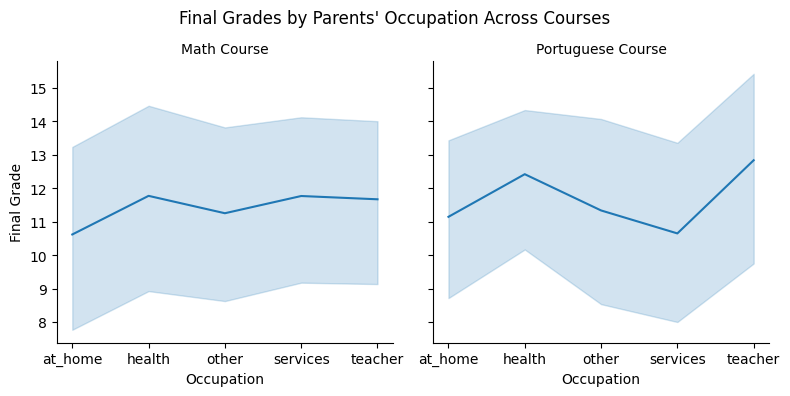

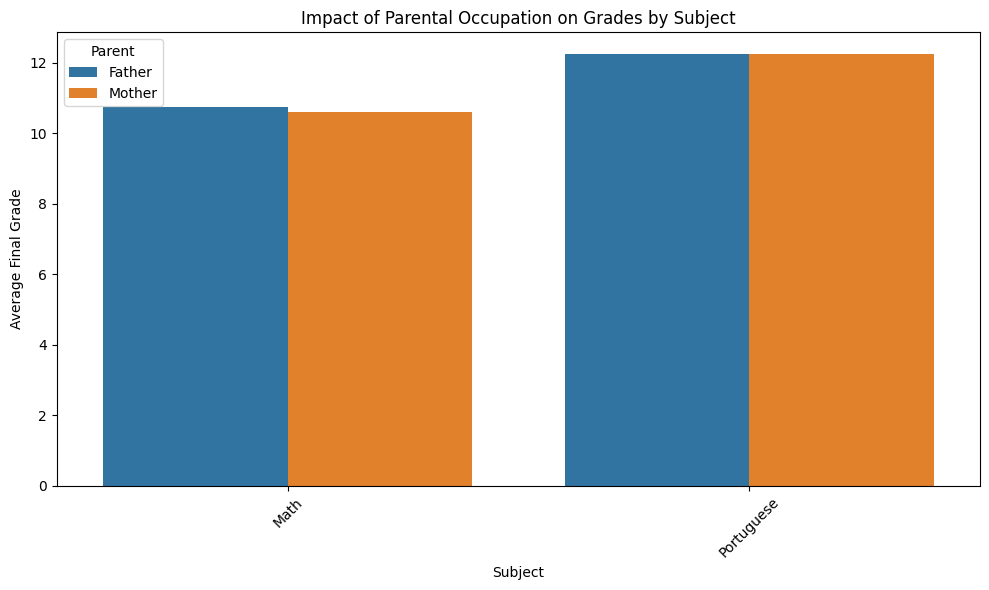

In [123]:
bysubj_data = pd.concat([df_combined[['final_grade', 'Mjob','course']].rename(columns={'Mjob': 'Occupation'}).assign(Parent='Mother'),df_combined[['final_grade', 'Fjob','course']].rename(columns={'Fjob': 'Occupation'}).assign(Parent='Father')])
occupation_counts = bysubj_data.groupby(['course', 'Occupation', 'final_grade']).size().reset_index(name='count')

g = sns.FacetGrid(occupation_counts, col="course", height=4, sharey=True, sharex=True)
g.map(sns.lineplot, "Occupation", "final_grade")

g.set_axis_labels("Occupation", "Final Grade")
g.set_titles("{col_name} Course")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Final Grades by Parents' Occupation Across Courses")
plt.show()


grouped_data = bysubj_data.groupby(['course', 'Parent', 'Occupation']).final_grade.mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data, 
    x="course", 
    y="final_grade", 
    hue="Parent", 
    errorbar=None
)

plt.title("Impact of Parental Occupation on Grades by Subject")
plt.xlabel("Subject")
plt.ylabel("Average Final Grade")
plt.legend(title="Parent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the faceted line chart, we can see that stay at home parents would result in lower grades of students in both subjects, which is consistent with the data we have analyzed further above. Interestingly, we notice that for parents in healthcare careers, students uniformly score very high on both subjects. The distinction lies in the Portuguese subject, where parent who are teachers have children with higher grades, and parents in service jobs' children score lowest. On the grouped bar graphs showing the impact of parental occupation on grades by subject, the data supports our findings in the line charts, which is that fo the Portuguese course, parental occupation has a higher impact on students' grades.

### One-Way ANOVA

Here we estabish the null hypothesis that there would be no significant relationship between parental education levels and students' final grades and we look to reject it:

In [124]:
from scipy.stats import f_oneway

# Grouping final grades by mother's education level
education_groups_mother = [combined_data['final_grade'][combined_data['mother_education'] == level] for level in combined_data['mother_education'].unique()]

# Grouping final grades by father's education level
education_groups_father = [combined_data['final_grade'][combined_data['father_education'] == level] for level in combined_data['father_education'].unique()]

# ANOVA for mother's education level impact on final grades
f_stat_mother, p_value_mother = f_oneway(*education_groups_mother)
print(f"ANOVA result for Mother's Education: F-statistic = {f_stat_mother:.2f}, p-value = {p_value_mother:.4f}")

# ANOVA for father's education level impact on final grades
f_stat_father, p_value_father = f_oneway(*education_groups_father)
print(f"ANOVA result for Father's Education: F-statistic = {f_stat_father:.2f}, p-value = {p_value_father:.4f}")


ANOVA result for Mother's Education: F-statistic = 12.55, p-value = 0.0000
ANOVA result for Father's Education: F-statistic = 8.08, p-value = 0.0000


From this test, we find that there is extremely strong evidence to reject the null hypothesis for both mother’s and father’s education levels, as indicated by the p-values of 0.0000. Since we have p-values of 0.0000, which are well below the common significance threshold (e.g., 0.05), we reject the null hypothesis and conclude that parental education does have a significant impact on students' academic performance. This finding implies that variations in students' final grades are associated with differences in parental education levels. The results reinforce the conclusion that higher parental education is linked to better student outcomes, emphasizing the importance of supporting educational initiatives for parents as a means to positively impact student success.

### T-test

In [125]:
from scipy.stats import ttest_ind

# Define thresholds for parental education levels
high_edu_threshold = 3  # Secondary or higher education
low_edu_threshold = 2   # Less than secondary education

# Split data into Math and Portuguese
math_data = df_combined[df_combined['course'] == 'Math'].copy()
portuguese_data = df_combined[df_combined['course'] == 'Portuguese'].copy()

# Helper function to perform t-tests
def parental_edu_ttests(data, subject_name):
    # Categorize students based on parental education levels
    data['high_parental_edu'] = (data['mother_education'] >= high_edu_threshold) | (data['father_education'] >= high_edu_threshold)
    data['low_parental_edu'] = (data['mother_education'] <= low_edu_threshold) & (data['father_education'] <= low_edu_threshold)

    # Extract final grades for the two groups
    high_edu_grades = data.loc[data['high_parental_edu'], 'final_grade']
    low_edu_grades = data.loc[data['low_parental_edu'], 'final_grade']

    # Perform t-test for overall impact of parental education
    overall_ttest = ttest_ind(high_edu_grades.dropna(), low_edu_grades.dropna(), equal_var=False)

    # Correlation between grades and parental education
    mother_corr = data['mother_education'].corr(data['final_grade'])
    father_corr = data['father_education'].corr(data['final_grade'])

    # T-test comparing impact of mother's vs. father's education
    high_mother_edu_grades = data.loc[data['mother_education'] >= high_edu_threshold, 'final_grade']
    high_father_edu_grades = data.loc[data['father_education'] >= high_edu_threshold, 'final_grade']
    mother_vs_father_ttest = ttest_ind(high_mother_edu_grades.dropna(), high_father_edu_grades.dropna(), equal_var=False)

    # Output results
    print(f"T-tests for {subject_name}:")
    print(f"  Overall Impact (High vs Low Parental Education): t-stat={overall_ttest.statistic:.2f}, p-value={overall_ttest.pvalue:.2e}")
    print(f"  Correlation - Mother’s Education: {mother_corr:.2f}, Father’s Education: {father_corr:.2f}")
    print(f"  Mother's vs Father's Education: t-stat={mother_vs_father_ttest.statistic:.2f}, p-value={mother_vs_father_ttest.pvalue:.2e}")
    print("\n")

# Perform t-tests for both subjects
parental_edu_ttests(math_data, "Math")
parental_edu_ttests(portuguese_data, "Portuguese")

T-tests for Math:
  Overall Impact (High vs Low Parental Education): t-stat=4.17, p-value=4.22e-05
  Correlation - Mother’s Education: 0.23, Father’s Education: 0.16
  Mother's vs Father's Education: t-stat=0.40, p-value=6.93e-01


T-tests for Portuguese:
  Overall Impact (High vs Low Parental Education): t-stat=5.29, p-value=1.74e-07
  Correlation - Mother’s Education: 0.24, Father’s Education: 0.22
  Mother's vs Father's Education: t-stat=-0.46, p-value=6.48e-01




Math Results: 
Students with high parental education levels performed significantly better in Math, as shown by a t-statistic of 4.17 and a very low p-value of 4.22×10⁻⁵. This supports the idea that higher parental education positively affects Math grades. The correlation analysis reveals that both mother’s (r = 0.23) and father’s (r = 0.16) education levels are positively linked to Math performance, with mother’s education showing a slightly stronger relationship. However, a t-test comparing the impact of mother’s and father’s education (p = 0.693) suggests no meaningful difference in their effects.

Portuguese Results: 
The influence of parental education on Portuguese grades appears even stronger, with a t-statistic of 5.29 and a p-value of 1.74×10⁻⁷. Both mother’s (r = 0.24) and father’s (r = 0.22) education levels are positively correlated with better grades, and again, mother’s education shows a slightly greater impact. However, like the Math results, the t-test (p = 0.648) indicates no significant difference between the contributions of maternal and paternal education. These findings confirm the importance of parental education while highlighting that the roles of both parents are similarly influential.

# Ethics & Privacy

Due to our specific focus, we anticipate sampling bias in our analysis. Using our main dataset, the Portuguese test scores dataset as an example, this data comes from a specific region and thus may not generalize fully to other populations. We aim to observe correlations between variables and document any potential biases identified throughout our analysis process. Privacy breaches are minimized since the dataset is anonymized.

Ethical Concerns in Each Step of the Data Science Process

Question: Our question is well and clearly posed to investigate the relationships between parental education level and students’ math and language scores. Ethically, there is a risk of reinforcing socioeconomic stereotypes by attributing academic performance solely to parental background. To mitigate this,  we will ensure our analysis acknowledges individual student factors and clarify in our reporting that correlations do not imply causation. This is critical to prevent potential misuse of findings for biased assumptions about students’ abilities based on parental education.

Implications:  Besides the implications demonstrated by the relationship of our question with socioeconomic status, schools, policymakers, and educators could benefit from the insights of this research. Schools could offer supplemental programs or resources for students based on their family backgrounds, providing additional support to students who stand to benefit from being availed of academic opportunity. Policymakers could also use this information to intervene using policies that can bridge educational gaps based on family circumstances. However, schools could also maliciously use this information, leading to discrimination or lower expectations for students based on their parents' educational background rather than their individual capabilities.

Biases:  We recognize that our dataset focuses on students from Portugal, which may introduce bias in terms of regional socioeconomic and cultural factors. To actively detect bias, we’ll analyze the data for any patterns that may disproportionately reflect these demographics. Additionally, we’ll monitor for biases during analysis by comparing with any other datasets we may include and by running diagnostic checks to ensure fair representation across variables.

Informed Consent and Privacy: The dataset mentioned comes from a paper in 2008, whose data has been anonymized meaning that all the names and associations have been removed. Consequently, there are no risks in private data leakages from using this dataset, since there is no information to leak unless the school who provided this information were to publicize their database. We are mindful, however, that while our data is anonymous, the implications of our findings could still impact privacy indirectly if generalized improperly.

Transparency and Appeal: : We adopt a “clear-box” approach, making our data sources, methodology, and code available. This enables others to validate or replicate our findings, promoting accountability. Since the data is publicly accessible and anonymized, privacy is preserved without any risk of direct data leaks.

Continuous Monitoring: Throughout this project, we will continuously monitor our findings for any unintended biases or patterns that could impact equitable outcomes.  We will also clearly state any limitations of our data and analysis in the final report to guide responsible interpretation by stakeholders. While we cannot control how others use this information, these disclaimers aim to prevent misuse from occurring.

Note: The Portuguese dataset discussed in this section can be accessed here: https://www.kaggle.com/datasets/whenamancodes/student-performance/data?select=Portuguese.csv


# Team Expectations 

* Open and respectful communication amongst team members, communication will be taking place on the discord server created. The server should be checked daily with prompt responses to any of the tasks/issues addressed in the conversation. 
* Everyone is involved in every part of the project whether it be them completing their tasks or making decisions. 
* *Attend all our meetings, going to be done through discord server, and work to complete any work that needs to be done during these meetings in an effective and efficient manner*
* Be ready to adapt to any changes that may occur during the project whether it be a teammate slacking off, not meeting deadlines, etc.
* Put in your best effort for all of the work assigned.
* If there is something that is preventing you from completing your work, communication with the team is necessary in order to accommodate and help you.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/10  |  8 PM | Finalize wrangling(Imraan); Begin EDA (Wilson)  | Go over the work done, see if any suggestions/improvements are needed and discuss analysis strategy/approaches | 
| 11/17  |  8 PM |  Complete EDA and initiate analysis discussions (Yashas; Nathan) | Discuss Analysis strategies; Complete project check-in, Go over EDA and make suggestions/changes | 
| 11/24  | 8 PM  | Complete analysis; Draft results/conclusion/discussion (Jude) | Review project and suggest any changes/edits to project. Discuss how final video will be done|
| 12/01  | 8 PM  | Make group video; Finalize/proofread project conclusion and submit report and video (everyone) | Turn in Final Project & Group Project Surveys|